All we need is to maximise weight of bags under 50, it's our main performance indicator. 


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import os

Lets load data and count items.

In [24]:

gifts=pd.read_csv("../input/gifts.csv", encoding = "ISO-8859-1")
gifts['type'] = gifts['GiftId'].apply(lambda x: x.split('_')[0])
gifts['id'] = gifts['GiftId'].apply(lambda x: x.split('_')[1])
gifts['type'].value_counts()

book      1200
ball      1100
horse     1000
blocks    1000
train     1000
doll      1000
bike       500
gloves     200
coal       166
Name: type, dtype: int64

In [25]:
def Weight(mType):
    if mType == "horse":
        return max(0, np.random.normal(5,2,1)[0])
    if mType == "ball":
        return max(0, 1 + np.random.normal(1,0.3,1)[0])
    if mType == "bike":
        return max(0, np.random.normal(20,10,1)[0])
    if mType == "train":
        return max(0, np.random.normal(10,5,1)[0])
    if mType == "coal":
        return 47 * np.random.beta(0.5,0.5,1)[0]
    if mType == "book":
        return np.random.chisquare(2,1)[0]
    if mType == "doll":
        return np.random.gamma(5,1,1)[0]
    if mType == "blocks":
        return np.random.triangular(5,10,20,1)[0]
    if mType == "gloves":
        return 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]

In [26]:
gifts['weight'] = gifts['type'].apply(lambda x: Weight(x))

Lets plot ours data on example of coal. Here we see the data distribution.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


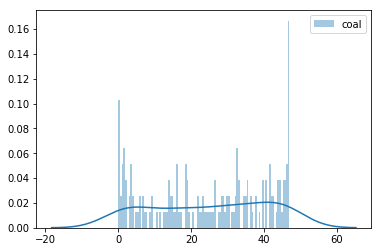

In [27]:
sns.distplot([tuple(gifts[gifts['type']=='coal']['weight'])],bins=100, label="coal");
plt.legend();

Factually all we need is to get good combinations for bags. For these we simulate 1000 bags for every posible combination for items from 3 to 8 and count average amount of weight we loose per bag and average amount of weight we get per bag.

In [28]:
stuff = ['book', 'coal', 'bike','train','blocks','doll','horse','gloves','ball']
combs=pd.DataFrame(columns=('comb', 'bags over 50', 'bags from 0 to 50'))
for size in np.arange(3,9):
    for subset in itertools.combinations_with_replacement(stuff, size):
        a=[]
        for i in range(0,1000):
            tmp =0.0
            for j in range(0,size):
                tmp+=Weight(subset[j])
            a.append(tmp)
        t=pd.DataFrame(a,columns=['weights'])
        more50=( t[t['weights'] > 50].sum()[0]/1000)
        f0to50=(t[(t['weights']<=50)].sum()[0]/1000)
        combs=combs.append(pd.DataFrame(np.array([[subset, more50, f0to50]]),columns=('comb', 'bags over 50', 'bags from 0 to 50')), ignore_index=True)
combs.loc[ (combs['bags from 0 to 50'] >= 25)].sort_values(by=['bags from 0 to 50'], ascending=False)

,comb,bags over 50,bags from 0 to 50
24174,"(doll, horse, horse, horse, horse, horse, hors...",1.60507,38.4266
23920,"(blocks, blocks, doll, doll, ball, ball, ball,...",2.68584,38.3477
4796,"(blocks, blocks, horse, horse, horse, gloves)",1.41624,38.3455
23935,"(blocks, blocks, doll, horse, ball, ball, ball...",3.33962,38.3328
23955,"(blocks, blocks, horse, horse, gloves, ball, b...",2.21916,38.2642
23956,"(blocks, blocks, horse, horse, ball, ball, bal...",2.64664,38.263
23919,"(blocks, blocks, doll, doll, gloves, ball, bal...",2.4694,38.1678
24210,"(horse, horse, horse, horse, horse, horse, hor...",1.72264,38.1535
17588,"(book, blocks, blocks, doll, horse, gloves, ba...",2.83022,38.1518
11144,"(blocks, blocks, doll, doll, ball, ball, ball)",1.15287,38.1418


Here we are having huge variety of combinations.As you see best combinations have same items blocks,horse and doll. We have to chose good combinations which will allow us to get not bad in future. Here Ijust chose combinations from list and use them to put items to bags.

In [31]:
coal=0
book=0
bike=0
train=0
blocks=0
doll=0
horse=0
gloves=0
ball=0
k=0
with open("../Santa_bags.csv", 'w') as f:
        f.write("Gifts \n")
        for i in range(1000):
            if horse<998:
                f.write('blocks_'+str(blocks)+' horse_'+str(horse)+' ball_'+str(ball))
                blocks+=1
                horse+=1
                ball+=1
                f.write(' blocks_'+str(blocks)+' horse_'+str(horse))
                blocks+=1
                horse+=1
                f.write(' horse_'+str(horse)+'\n')
                horse+=1
                k+=1
            elif  ball<1098:
                f.write('bike_'+str(bike)+' blocks_'+str(blocks)+' ball_'+str(ball))
                bike+=1
                blocks+=1
                ball+=1
                f.write(' ball_'+str(ball))
                ball+=1
                f.write(' ball_'+str(ball)+'\n')
                ball+=1
                k+=1
            elif horse<1000:
                f.write('blocks_'+str(blocks)+' doll_'+str(doll)+' horse_'+str(horse)+' ball_'+str(ball))
                blocks+=1
                doll+=1
                horse+=1
                ball+=1
                f.write(' blocks_'+str(blocks)+' doll_'+str(doll)+'\n')
                blocks+=1
                doll+=1
                k+=1
            elif blocks<998:
                f.write('blocks_'+str(blocks)+' doll_'+str(doll)+' gloves_'+str(gloves))
                blocks+=1
                doll+=1
                gloves+=1
                f.write(' blocks_'+str(blocks)+' doll_'+str(doll))
                blocks+=1
                doll+=1
                f.write(' doll_'+str(doll)+'\n')
                doll+=1
                k+=1
            elif  gloves<200 and train<999:
                f.write('book_'+str(book)+' train_'+str(train)+' doll_'+str(doll)+' gloves_'+str(gloves))
                book+=1
                train+=1
                gloves+=1
                doll+=1
                f.write(' train_'+str(train))
                train+=1
                f.write(' train_'+str(train)+'\n')      
                train+=1
                doll+=1
                k+=1
            elif   book<1200 and doll<854:
                f.write('book_'+str(book)+' doll_'+str(doll))
                book+=1
                doll+=1
                f.write(' book_'+str(book)+' doll_'+str(doll))    
                book+=1
                doll+=1
                f.write(' book_'+str(book)+' doll_'+str(doll))
                book+=1
                doll+=1
                f.write(' doll_'+str(doll))
                doll+=1
                f.write(' doll_'+str(doll))
                doll+=1
                f.write(' doll_'+str(doll)+'\n')
                doll+=1
                k+=1
            elif   train<999and doll<1000:
                f.write('book_'+str(book)+' train_'+str(train)+' doll_'+str(doll))
                book+=1
                train+=1
                doll+=1
                f.write(' train_'+str(train))    
                train+=1
                f.write(' train_'+str(train)+'\n')
                train+=1
                k+=1
            elif   book<1200 and doll<1000:
                f.write('book_'+str(book)+' bike_'+str(bike)+' doll_'+str(doll))
                book+=1
                bike+=1
                doll+=1
                f.write(' book_'+str(book)+' doll_'+str(doll))    
                book+=1
                doll+=1
                f.write(' book_'+str(book)+'\n')
                book+=1     
                k+=1                                       
print("coal max(166)",coal)                
print("horse max(1000)",horse)
print("book max(1200)",book)
print("bike max(500)",bike)
print("gloves max(200)",gloves)
print("train max(1000)",train)
print("ball max(1100)",ball)
print("doll max(1000)",doll)
print("blocks max(1000)",blocks)
print(k)

coal max(166) 0
horse max(1000) 1000
book max(1200) 511
bike max(500) 255
gloves max(200) 200
train max(1000) 912
ball max(1100) 1099
doll max(1000) 996
blocks max(1000) 999
1000


Also we can fit our combination to ansvers for getting better results.

In [33]:
#35349.71148
coal=0
book=1199
bike=8
train=2
blocks=0
doll=0
horse=999
gloves=0
ball=0
k=0
with open("Santa_bags_fitted.csv", 'w') as f:
        f.write("Gifts \n")
        for i in range(1000):
            
            if horse>=1:
                f.write('blocks_'+str(blocks)+' horse_'+str(horse)+' ball_'+str(ball)+' book_'+str(book))
                blocks+=1
                horse-=1
                ball+=1
                book-=1
                f.write(' blocks_'+str(blocks)+' horse_'+str(horse))
                blocks+=1
                horse-=1
                f.write(' horse_'+str(horse)+'\n')
                horse-=1
                k+=1
            elif  ball<1098:
                f.write('bike_'+str(bike)+' blocks_'+str(blocks)+' ball_'+str(ball))
                bike+=1
                blocks+=1
                ball+=1
                f.write(' ball_'+str(ball))
                ball+=1
                f.write(' ball_'+str(ball)+'\n')
                ball+=1
                k+=1       
            elif horse>=0 :
                f.write('blocks_'+str(blocks)+' doll_'+str(doll)+' horse_'+str(horse)+' ball_'+str(ball))
                blocks+=1
                doll+=1
                horse-=1
                ball+=1
                f.write(' blocks_'+str(blocks)+' doll_'+str(doll)+'\n')
                blocks+=1
                doll+=1
                k+=1
            elif blocks<998:
                f.write('blocks_'+str(blocks)+' doll_'+str(doll)+' gloves_'+str(gloves))
                blocks+=1
                doll+=1
                gloves+=1
                f.write(' blocks_'+str(blocks)+' doll_'+str(doll))
                blocks+=1
                doll+=1
                f.write(' doll_'+str(doll)+'\n')
                doll+=1
                k+=1
            elif  gloves<200 and train<999:
                f.write('book_'+str(book)+' train_'+str(train)+' doll_'+str(doll)+' gloves_'+str(gloves))
                book-=1
                train+=1
                gloves+=1
                doll+=1
                f.write(' train_'+str(train))
                train+=1
                f.write(' train_'+str(train)+'\n')      
                train+=1
                doll+=1
                k+=1
            elif   train<998and doll<1000 and i%4==0:
                f.write('book_'+str(book)+' train_'+str(train)+' doll_'+str(doll))
                book-=1
                train+=1
                doll+=1
                f.write(' train_'+str(train)+' book_'+str(book))    
                train+=1
                book-=1
                f.write(' train_'+str(train)+'\n')
                train+=1
                k+=1
            elif   train<998and doll<1000:
                f.write('book_'+str(book)+' train_'+str(train)+' doll_'+str(doll))
                book-=1
                train+=1
                doll+=1
                f.write(' train_'+str(train))    
                train+=1
                f.write(' train_'+str(train)+'\n')
                train+=1
                k+=1
            elif   book<1200 and doll<854:
                f.write('book_'+str(book)+' doll_'+str(doll))
                book-=1
                doll+=1
                f.write(' book_'+str(book)+' doll_'+str(doll))    
                book-=1
                doll+=1
                f.write(' book_'+str(book)+' doll_'+str(doll))
                book-=1
                doll+=1
                f.write(' doll_'+str(doll))
                doll+=1
                f.write(' doll_'+str(doll))
                doll+=1
                f.write(' doll_'+str(doll)+'\n')
                doll+=1
                k+=1
            elif coal < 166:
                f.write('coal_'+str(coal)+' book_'+str(book))
                coal+=1
                book-=1
                f.write(' book_'+str(book)+'\n')
                book-=1
                k+=1    
            elif   book<1200 and doll<860:
                f.write('book_'+str(book)+' bike_'+str(bike)+' doll_'+str(doll))
                book-=1
                bike+=1
                doll+=1
                f.write(' book_'+str(book)+' doll_'+str(doll))    
                book-=1
                doll+=1
                f.write(' book_'+str(book)+'\n')
                book-=1     
                k+=1                       
print("coal max(166)",coal)                
print("horse min(-1)",horse)
print("book min(-1)",book)
print("bike max(500)",bike)
print("gloves max(200)",gloves)
print("train max(1000)",train)
print("ball max(1100)",ball)
print("doll max(1000)",doll)
print("blocks max(1000)",blocks)
print(k)

coal max(166) 0
horse min(-1) -1
book min(-1) 369
bike max(500) 263
gloves max(200) 200
train max(1000) 998
ball max(1100) 1099
doll max(1000) 856
blocks max(1000) 999
1000


And here we are. We can work on futher improwements with other combinarions.